In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
df=pd.read_csv("/content/sample_data/data.csv")
df

,Unnamed: 0,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...
3727,3727,397100307,4,2016-4,Singapore,Bought the tram disney ocean park package over...,Disneyland_HongKong
3728,3728,396987539,5,2016-7,United Kingdom,"Great park lots to do and see , very clean sta...",Disneyland_HongKong
3729,3729,396743333,4,2016-5,Mexico,"Disney Hong Kong, is amazing as all disneyland...",Disneyland_HongKong
3730,3730,396521742,3,2015-12,Mauritius,"Overall the place is ok. Yet, you need to plan...",Disneyland_HongKong


In [4]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0           0.000000
Review_ID            0.000000
Rating               0.000000
Year_Month           0.000000
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.026795
dtype: float64

In [5]:
df["Branch"].fillna(df["Branch"].mode()[0],inplace=True)

In [6]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0           0.0
Review_ID            0.0
Rating               0.0
Year_Month           0.0
Reviewer_Location    0.0
Review_Text          0.0
Branch               0.0
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

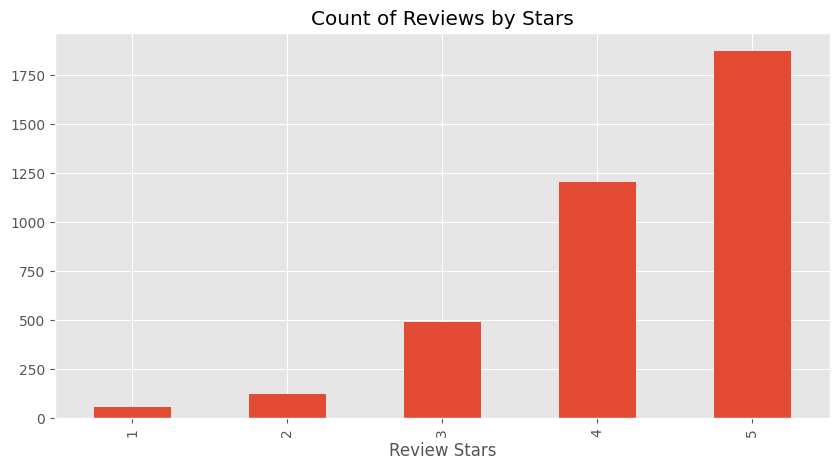

In [8]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# Example Text with its correspondant Rating

In [9]:
print(df["Review_Text"][0])
print(f"\n Review rate: {df['Rating'][0]}")
example=df["Review_Text"][0]

If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 

 Review rate: 4


In [10]:
example

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [11]:
tokens = nltk.word_tokenize(example)
tokens[:15]

['If',
 'you',
 "'ve",
 'ever',
 'been',
 'to',
 'Disneyland',
 'anywhere',
 'you',
 "'ll",
 'find',
 'Disneyland',
 'Hong',
 'Kong',
 'very']

In [12]:
tagged = nltk.pos_tag(tokens)
tagged[:15]

[('If', 'IN'),
 ('you', 'PRP'),
 ("'ve", 'VBP'),
 ('ever', 'RB'),
 ('been', 'VBN'),
 ('to', 'TO'),
 ('Disneyland', 'NNP'),
 ('anywhere', 'RB'),
 ('you', 'PRP'),
 ("'ll", 'MD'),
 ('find', 'VB'),
 ('Disneyland', 'NNP'),
 ('Hong', 'NNP'),
 ('Kong', 'NNP'),
 ('very', 'RB')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  If/IN
  you/PRP
  've/VBP
  ever/RB
  been/VBN
  to/TO
  (GPE Disneyland/NNP)
  anywhere/RB
  you/PRP
  'll/MD
  find/VB
  (ORGANIZATION Disneyland/NNP Hong/NNP Kong/NNP)
  very/RB
  similar/JJ
  in/IN
  the/DT
  layout/NN
  when/WRB
  you/PRP
  walk/VBP
  into/IN
  main/JJ
  street/NN
  !/.
  It/PRP
  has/VBZ
  a/DT
  very/RB
  familiar/JJ
  feel/NN
  ./.
  One/CD
  of/IN
  the/DT
  rides/NNS
  its/PRP$
  a/DT
  Small/NNP
  World/NNP
  is/VBZ
  absolutely/RB
  fabulous/JJ
  and/CC
  worth/JJ
  doing/VBG
  ./.
  The/DT
  day/NN
  we/PRP
  visited/VBD
  was/VBD
  fairly/RB
  hot/JJ
  and/CC
  relatively/RB
  busy/JJ
  but/CC
  the/DT
  queues/NNS
  moved/VBD
  fairly/RB
  well/RB
  ./.)


In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.7069}

In [16]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review_Text']
    myid = row['Review_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/3732 [00:00<?, ?it/s]

In [17]:
result_df=pd.DataFrame(res)
result_df=result_df.T
result_df

,neg,neu,pos,compound
670772142,0.000,0.887,0.113,0.7069
670682799,0.040,0.730,0.231,0.9901
670623270,0.024,0.742,0.235,0.9920
670607911,0.080,0.760,0.160,0.8489
670607296,0.000,0.899,0.101,0.2846
...,...,...,...,...
397100307,0.055,0.916,0.029,-0.3903
396987539,0.045,0.787,0.168,0.8126
396743333,0.000,0.686,0.314,0.9239
396521742,0.083,0.830,0.087,0.0772


In [18]:
result_df = result_df.reset_index().rename(columns={'index': 'Review_ID'})
result_df = result_df.merge(df, how='left')
result_df

,Review_ID,neg,neu,pos,compound,Unnamed: 0,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,0.000,0.887,0.113,0.7069,0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,0.040,0.730,0.231,0.9901,1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,0.024,0.742,0.235,0.9920,2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,0.080,0.760,0.160,0.8489,3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,0.000,0.899,0.101,0.2846,4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...,...
3727,397100307,0.055,0.916,0.029,-0.3903,3727,4,2016-4,Singapore,Bought the tram disney ocean park package over...,Disneyland_HongKong
3728,396987539,0.045,0.787,0.168,0.8126,3728,5,2016-7,United Kingdom,"Great park lots to do and see , very clean sta...",Disneyland_HongKong
3729,396743333,0.000,0.686,0.314,0.9239,3729,4,2016-5,Mexico,"Disney Hong Kong, is amazing as all disneyland...",Disneyland_HongKong
3730,396521742,0.083,0.830,0.087,0.0772,3730,3,2015-12,Mauritius,"Overall the place is ok. Yet, you need to plan...",Disneyland_HongKong


In [19]:
result_df=result_df.drop("Unnamed: 0",axis=1)
result_df

,Review_ID,neg,neu,pos,compound,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,0.000,0.887,0.113,0.7069,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,0.040,0.730,0.231,0.9901,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,0.024,0.742,0.235,0.9920,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,0.080,0.760,0.160,0.8489,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,0.000,0.899,0.101,0.2846,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...,...,...,...,...
3727,397100307,0.055,0.916,0.029,-0.3903,4,2016-4,Singapore,Bought the tram disney ocean park package over...,Disneyland_HongKong
3728,396987539,0.045,0.787,0.168,0.8126,5,2016-7,United Kingdom,"Great park lots to do and see , very clean sta...",Disneyland_HongKong
3729,396743333,0.000,0.686,0.314,0.9239,4,2016-5,Mexico,"Disney Hong Kong, is amazing as all disneyland...",Disneyland_HongKong
3730,396521742,0.083,0.830,0.087,0.0772,3,2015-12,Mauritius,"Overall the place is ok. Yet, you need to plan...",Disneyland_HongKong


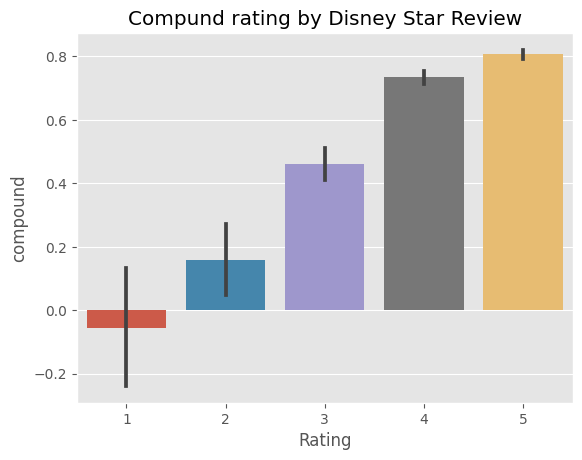

In [20]:
ax = sns.barplot(data=result_df, x='Rating', y='compound')
ax.set_title('Compund rating by Disney Star Review')
plt.show()

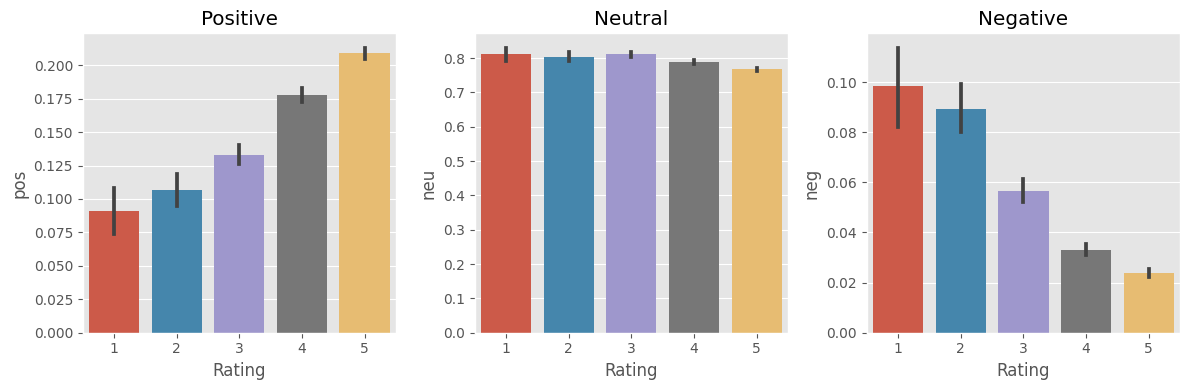

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=result_df, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=result_df, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=result_df, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [24]:
# VADER results on example
print(example)
sia.polarity_scores(example)

If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 


{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.7069}

In [25]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt') #returns encoded text in a PyTorch tensor
output = model(**encoded_text) #**encoded_text syntax is used to unpack the dictionary of tensors returned by the tokenizer into keyword arguments for the model.
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0014537597, 'roberta_neu': 0.01376003, 'roberta_pos': 0.9847862}


In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

## Run on GPU to make it faster otherwise it may take some time

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review_Text']
        myid = row['Review_ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        try:
            roberta_result = polarity_scores_roberta(text)
            # Combine results from VADER and RoBERTa into a single dictionary
            both = {**vader_result_rename, **roberta_result}
            res[myid] = both

        except RuntimeError:
            print(f'Broke for RoBERTa with id {myid}')

    except Exception as e:
        print(f'Error processing id {myid}: {e}')


  0%|          | 0/3732 [00:00<?, ?it/s]

Broke for RoBERTa with id 668777351
Broke for RoBERTa with id 641689558
Broke for RoBERTa with id 629073732
Broke for RoBERTa with id 625303443
Broke for RoBERTa with id 622768816
Broke for RoBERTa with id 611414876
Broke for RoBERTa with id 588779840
Broke for RoBERTa with id 587107992
Broke for RoBERTa with id 583615974
Broke for RoBERTa with id 581160653
Broke for RoBERTa with id 544141605
Broke for RoBERTa with id 541903961
Broke for RoBERTa with id 539556247
Broke for RoBERTa with id 538740219
Broke for RoBERTa with id 537126079
Broke for RoBERTa with id 535957202
Broke for RoBERTa with id 535786405
Broke for RoBERTa with id 535385151
Broke for RoBERTa with id 527224973
Broke for RoBERTa with id 503964199
Error processing id 500960346: index out of range in self
Broke for RoBERTa with id 499017677
Broke for RoBERTa with id 497042786
Broke for RoBERTa with id 488612724
Broke for RoBERTa with id 481108330
Broke for RoBERTa with id 476680394
Broke for RoBERTa with id 474451880
Broke 

In [46]:
result_df.columns

Index(['Review_ID', 'neg', 'neu', 'pos', 'compound', 'Rating', 'Year_Month',
       'Reviewer_Location', 'Review_Text', 'Branch'],
      dtype='object')

In [47]:
results_df2 = pd.DataFrame(res).T
results_df2 = results_df2.reset_index().rename(columns={'index': 'Review_ID'})
results_df2 = results_df2.merge(result_df, how='left')

In [37]:
results_df2

,Id,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,0,670772142,0.000,0.887,0.113,0.7069,0.001454,0.013760,0.984786
1,1,670682799,0.040,0.730,0.231,0.9901,0.022266,0.118747,0.858987
2,2,670623270,0.024,0.742,0.235,0.9920,0.021623,0.079558,0.898818
3,3,670607911,0.080,0.760,0.160,0.8489,0.022697,0.114105,0.863198
4,4,670607296,0.000,0.899,0.101,0.2846,0.097984,0.337945,0.564070
...,...,...,...,...,...,...,...,...,...
3684,3684,397100307,0.055,0.916,0.029,-0.3903,0.236199,0.360575,0.403226
3685,3685,396987539,0.045,0.787,0.168,0.8126,0.005460,0.020687,0.973853
3686,3686,396743333,0.000,0.686,0.314,0.9239,0.001428,0.007701,0.990870
3687,3687,396521742,0.083,0.830,0.087,0.0772,0.417822,0.480787,0.101391


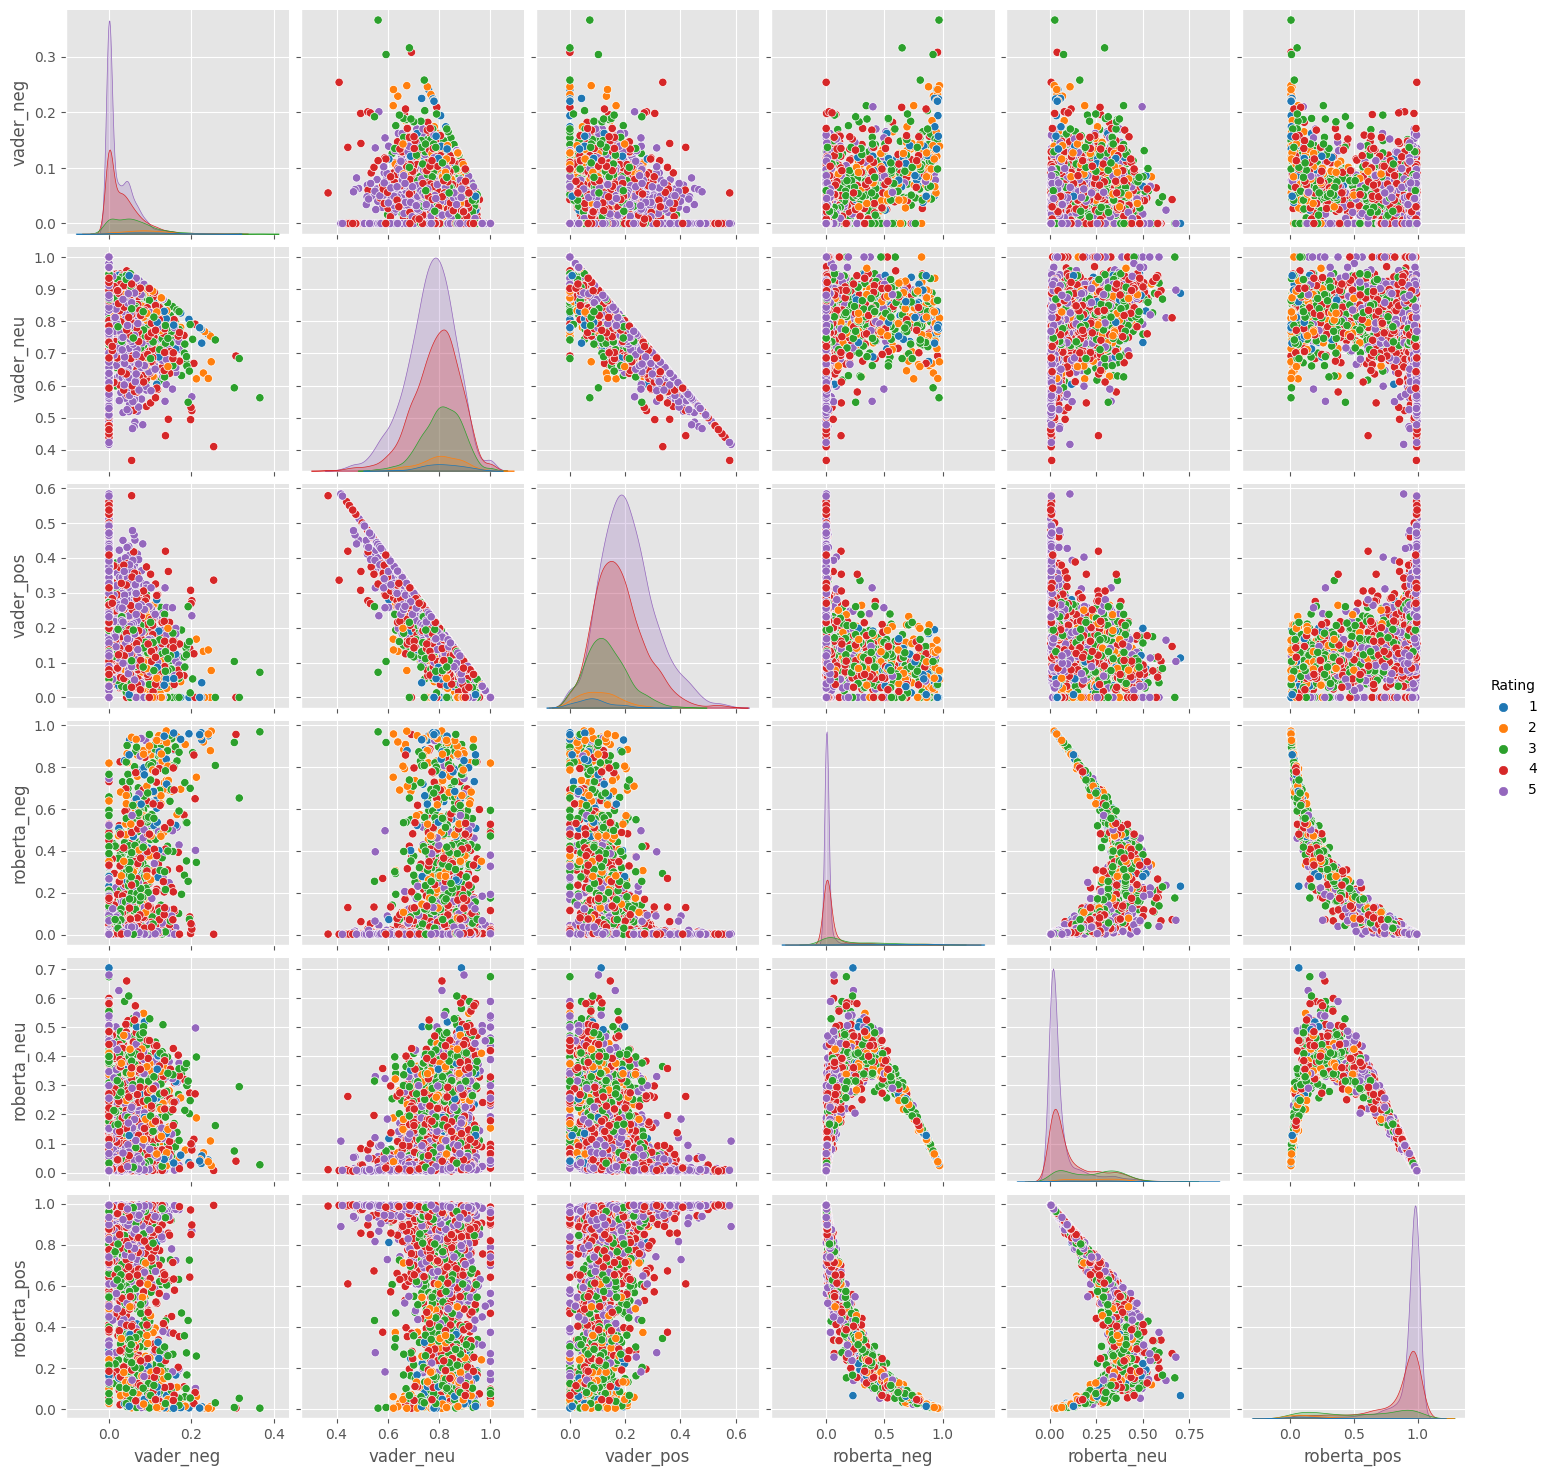

In [48]:
sns.pairplot(data=results_df2,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()